In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *

In [2]:
business = pd.read_csv("business.csv")
economy = pd.read_csv("economy.csv")
df_cleaned = pd.read_csv("Clean_Dataset.csv")

In [3]:
economy

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [4]:
df_cleaned

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
extra_airlines = []
for i in economy["airline"].unique():
    if " " in i:
        k = i.replace(" ","_")
    else:
        k = i
    if k not in df_cleaned["airline"].unique():
        extra_airlines.append(k)

In [21]:
print(business["airline"].unique())

['Air India' 'Vistara']


In [6]:
extra_airlines

['Trujet', 'StarAir']

In [7]:
df_cleaned_1 = df_cleaned.drop(columns="Unnamed: 0")

In [8]:
pp = False
for i in extra_airlines:
    pp = (pp  | (economy["airline"] == i))
qq = economy[pp].copy().reset_index(drop=True).drop(columns="date")
qq_1 = qq.copy()
qq_1["flight"] = list(map((lambda x,y: x + "-" + str(y)),qq["ch_code"],qq["num_code"]))
qq_2 = qq_1.drop(columns=["ch_code","num_code"])
qq_2["class"] = "Economy"
qq_2["days_left"] = np.nan
col_dict = {
    "from":"source_city",
    "dep_time":"departure_time",
    "stop":"stops",
    "arr_time":"arrival_time",
    "to":"destination_city",
    "time_taken":"duration",
}
qq_2 = qq_2.rename(columns=col_dict)
qq_2 = qq_2[df_cleaned_1.columns.values]
qq_2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Trujet,2T-518,Mumbai,11:40,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Hyderabad,Economy,7h 20m,NaN,"3,166"
1,Trujet,2T-518,Mumbai,11:40,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Hyderabad,Economy,7h 20m,NaN,"3,166"
2,Trujet,2T-518,Mumbai,11:40,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Hyderabad,Economy,7h 20m,NaN,"3,166"
3,Trujet,2T-518,Mumbai,11:40,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Hyderabad,Economy,7h 20m,NaN,"3,166"
4,Trujet,2T-518,Mumbai,11:40,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Hyderabad,Economy,7h 20m,NaN,"3,166"
...,...,...,...,...,...,...,...,...,...,...,...
97,Trujet,2T-623,Hyderabad,08:35,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,11:00,Bangalore,Economy,2h 25m,NaN,"3,196"
98,StarAir,S5-152,Hyderabad,20:20,non-stop,21:25,Bangalore,Economy,01h 05m,NaN,"2,115"
99,Trujet,2T-623,Hyderabad,08:35,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,11:00,Bangalore,Economy,2h 25m,NaN,"3,196"
100,StarAir,S5-152,Hyderabad,20:20,non-stop,21:25,Bangalore,Economy,01h 05m,NaN,"2,115"


In [9]:
def convert_time_to_phases(hr):
    phase = ""
    if hr in range(0,4):
        phase = "Late_Night"
    elif hr in range(4,8):
        phase = "Early_Morning"
    elif hr in range(8,12):
        phase = "Morning"
    elif hr in range(12,16):
        phase = "Afternoon"
    elif hr in range(16,20):
        phase = "Evening"
    elif hr in range(20,24):
        phase = "Night"
    return phase

In [10]:
qq_3 = qq_2.copy()
a = pd.to_datetime(qq_2["departure_time"]).dt.hour
b = pd.to_datetime(qq_2["arrival_time"]).dt.hour
qq_3["departure_time"] = list(map(lambda x: convert_time_to_phases(x),a))
qq_3["arrival_time"] = list(map(lambda x: convert_time_to_phases(x),b))
qq_3

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Trujet,2T-518,Mumbai,Morning,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,Economy,7h 20m,NaN,"3,166"
1,Trujet,2T-518,Mumbai,Morning,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,Economy,7h 20m,NaN,"3,166"
2,Trujet,2T-518,Mumbai,Morning,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,Economy,7h 20m,NaN,"3,166"
3,Trujet,2T-518,Mumbai,Morning,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,Economy,7h 20m,NaN,"3,166"
4,Trujet,2T-518,Mumbai,Morning,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,Economy,7h 20m,NaN,"3,166"
...,...,...,...,...,...,...,...,...,...,...,...
97,Trujet,2T-623,Hyderabad,Morning,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Morning,Bangalore,Economy,2h 25m,NaN,"3,196"
98,StarAir,S5-152,Hyderabad,Night,non-stop,Night,Bangalore,Economy,01h 05m,NaN,"2,115"
99,Trujet,2T-623,Hyderabad,Morning,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Morning,Bangalore,Economy,2h 25m,NaN,"3,196"
100,StarAir,S5-152,Hyderabad,Night,non-stop,Night,Bangalore,Economy,01h 05m,NaN,"2,115"


In [11]:
qq_4 = qq_3.copy()
qq_4["stops"] = list(map(lambda x: x.replace("\n","").replace("\t",""),qq_3["stops"]))
qq_4["duration"].unique()
def clean_time(ti):
    ti = ti.split(" ")
    hr = float(ti[0].replace("h",""))
    min = float(ti[1].replace("m",""))
    total_time = round((hr + (min/60)),2)
    return total_time
qq_4["duration"] = list(map(lambda x: clean_time(x),qq_3["duration"]))
qq_4["price"] = list(map(lambda x: int(x.replace(",","")),qq_3["price"]))
qq_4

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Trujet,2T-518,Mumbai,Morning,1-stop,Evening,Hyderabad,Economy,7.33,NaN,3166
1,Trujet,2T-518,Mumbai,Morning,1-stop,Evening,Hyderabad,Economy,7.33,NaN,3166
2,Trujet,2T-518,Mumbai,Morning,1-stop,Evening,Hyderabad,Economy,7.33,NaN,3166
3,Trujet,2T-518,Mumbai,Morning,1-stop,Evening,Hyderabad,Economy,7.33,NaN,3166
4,Trujet,2T-518,Mumbai,Morning,1-stop,Evening,Hyderabad,Economy,7.33,NaN,3166
...,...,...,...,...,...,...,...,...,...,...,...
97,Trujet,2T-623,Hyderabad,Morning,1-stop,Morning,Bangalore,Economy,2.42,NaN,3196
98,StarAir,S5-152,Hyderabad,Night,non-stop,Night,Bangalore,Economy,1.08,NaN,2115
99,Trujet,2T-623,Hyderabad,Morning,1-stop,Morning,Bangalore,Economy,2.42,NaN,3196
100,StarAir,S5-152,Hyderabad,Night,non-stop,Night,Bangalore,Economy,1.08,NaN,2115


In [12]:
df = pd.concat([df_cleaned_1,qq_4],axis=0,ignore_index=True).reset_index()
df["days_left"] = df["days_left"].fillna(df["days_left"].median())
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300250,300250,Trujet,2T-623,Hyderabad,Morning,1-stop,Morning,Bangalore,Economy,2.42,26.0,3196
300251,300251,StarAir,S5-152,Hyderabad,Night,non-stop,Night,Bangalore,Economy,1.08,26.0,2115
300252,300252,Trujet,2T-623,Hyderabad,Morning,1-stop,Morning,Bangalore,Economy,2.42,26.0,3196
300253,300253,StarAir,S5-152,Hyderabad,Night,non-stop,Night,Bangalore,Economy,1.08,26.0,2115


In [13]:
df_1 = df.drop(columns=["index","airline","flight"])
df_1

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953
1,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953
2,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956
3,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955
4,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955
...,...,...,...,...,...,...,...,...,...
300250,Hyderabad,Morning,1-stop,Morning,Bangalore,Economy,2.42,26.0,3196
300251,Hyderabad,Night,non-stop,Night,Bangalore,Economy,1.08,26.0,2115
300252,Hyderabad,Morning,1-stop,Morning,Bangalore,Economy,2.42,26.0,3196
300253,Hyderabad,Night,non-stop,Night,Bangalore,Economy,1.08,26.0,2115


In [14]:
print(df_1["stops"].unique())

['zero' 'one' 'two_or_more' '1-stop' 'non-stop ']


In [15]:
city_dict = {}
ctr = 0
for i in np.sort(df_1["source_city"].unique()):
    city_dict[i] = ctr
    ctr += 1

time_dict = {
    "Late_Night":0,
    "Early_Morning":1,
    "Morning":2,
    "Afternoon":3,
    "Evening":4,
    "Night":5,
}


stops_dict = {
    "zero":0,
    "non-stop ":0,
    "one":1,
    "1-stop":1,
    "two_or_more":2
}

class_dict = {"Economy":0,"Business":1}

df_2 = df_1.copy()

df_2["source_city"] = df_2["source_city"].map(city_dict)
df_2["destination_city"] = df_2["destination_city"].map(city_dict)

df_2["stops"] = df_2["stops"].map(stops_dict)

df_2["departure_time"] = df_2["departure_time"].map(time_dict)
df_2["arrival_time"] = df_2["arrival_time"].map(time_dict)

df_2["class"] = df_2["class"].map(class_dict)

In [16]:
df_2

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,2,4,0,5,5,0,2.17,1.0,5953
1,2,1,0,2,5,0,2.33,1.0,5953
2,2,1,0,1,5,0,2.17,1.0,5956
3,2,2,0,3,5,0,2.25,1.0,5955
4,2,2,0,2,5,0,2.33,1.0,5955
...,...,...,...,...,...,...,...,...,...
300250,3,2,1,2,0,0,2.42,26.0,3196
300251,3,5,0,5,0,0,1.08,26.0,2115
300252,3,2,1,2,0,0,2.42,26.0,3196
300253,3,5,0,5,0,0,1.08,26.0,2115


In [17]:
X = df_2.drop(columns="price")
y = df_2["price"]

In [18]:
X

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,2,4,0,5,5,0,2.17,1.0
1,2,1,0,2,5,0,2.33,1.0
2,2,1,0,1,5,0,2.17,1.0
3,2,2,0,3,5,0,2.25,1.0
4,2,2,0,2,5,0,2.33,1.0
...,...,...,...,...,...,...,...,...
300250,3,2,1,2,0,0,2.42,26.0
300251,3,5,0,5,0,0,1.08,26.0
300252,3,2,1,2,0,0,2.42,26.0
300253,3,5,0,5,0,0,1.08,26.0


In [54]:
mms = MinMaxScaler()
X_res = pd.DataFrame(mms.fit_transform(X),columns=X.columns)
y_res = y.copy()

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=np.random.randint(0,1000))

In [72]:
len(X_train)

240204

In [73]:
sgd_regr = SGDRegressor()
sgd_regr.fit(X_train,y_train)

SGDRegressor()

In [74]:
y_pred = np.abs(sgd_regr.predict(X_test))

In [75]:
compare_original_and_predict = pd.DataFrame(columns=["Actual","Predicted"])
compare_original_and_predict["Actual"] = y_test
compare_original_and_predict["Predicted"] = y_pred.round(0).astype("int64")

In [76]:
compare_original_and_predict

,Actual,Predicted
227553,22140,46593
229590,29764,50259
193592,5037,4192
116502,3499,1021
29174,9840,10351
...,...,...
254775,62188,53281
286765,51707,53259
27950,3999,1417
51797,2339,3131


In [77]:
mean_absolute_error_regr = mean_absolute_error(y_test,y_pred)
root_mean_absolute_error_regr = np.sqrt(mean_absolute_error(y_test,y_pred))
mean_squared_error_regr = mean_squared_error(y_test,y_pred)
root_mean_squared_error_regr = np.sqrt(mean_squared_error(y_test,y_pred))
mean_squared_log_error_regr = mean_squared_log_error(y_test,y_pred)
r2_score_regr = r2_score(y_test,y_pred)
mean_absolute_percentage_error_regr = mean_absolute_percentage_error(y_test,y_pred)

In [78]:
print("Mean Absolute Error             :  ",round(mean_absolute_error_regr,2))
print("Root Mean Absolute Error        :  ",round(root_mean_absolute_error_regr,2))
print("Mean Squared Error              :  ",round(mean_squared_error_regr,2))
print("Root Mean Squared Error         :  ",round(root_mean_squared_error_regr,2))
print("Mean Squared Logarithmic Error  :  ",round(mean_squared_log_error_regr,2))
print("R2 score                        :  ",round(r2_score_regr,2))
print("Mean Absolute Percentage Error  :  ",round(mean_absolute_percentage_error_regr,2))

Mean Absolute Error             :   4495.22
Root Mean Absolute Error        :   67.05
Mean Squared Error              :   50481158.22
Root Mean Squared Error         :   7105.01
Mean Squared Logarithmic Error  :   0.34
R2 score                        :   0.9
Mean Absolute Percentage Error  :   0.38


In [208]:
ll = df[df["class"]=="Economy"]

departure_time  arrival_time 
Afternoon       Afternoon        5615.913687
                Early_Morning    6739.619949
                Evening          6322.625064
                Late_Night       5230.363062
                Morning          7549.887911
                Night            6679.881287
Early_Morning   Afternoon        6410.026718
                Early_Morning    4318.937642
                Evening          7478.610852
                Late_Night       8050.610849
                Morning          5344.872762
                Night            7292.700169
Evening         Afternoon        7442.128173
                Early_Morning    5990.280093
                Evening          6790.196029
                Late_Night       5294.138815
                Morning          7305.499459
                Night            5688.924654
Late_Night      Afternoon        7372.036364
                Early_Morning    3786.540373
                Evening          7669.437500
                Late_Nigh

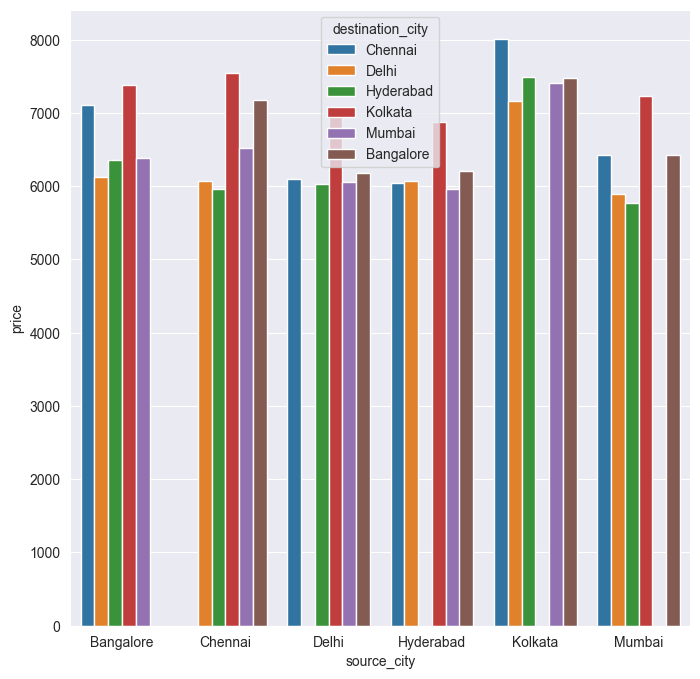

In [218]:
ll = df[df["class"]=="Economy"].groupby(["source_city","destination_city"])["price"].mean().round(0).astype("int64").reset_index()
fig,ax = plt.subplots(figsize=(8,8))
ll_dict = dict(ll["price"])
sns.barplot(ax=ax,x=ll["source_city"],y=ll["price"],hue=ll["destination_city"])
for i in ll_dict:
    v = ll_dict[i]

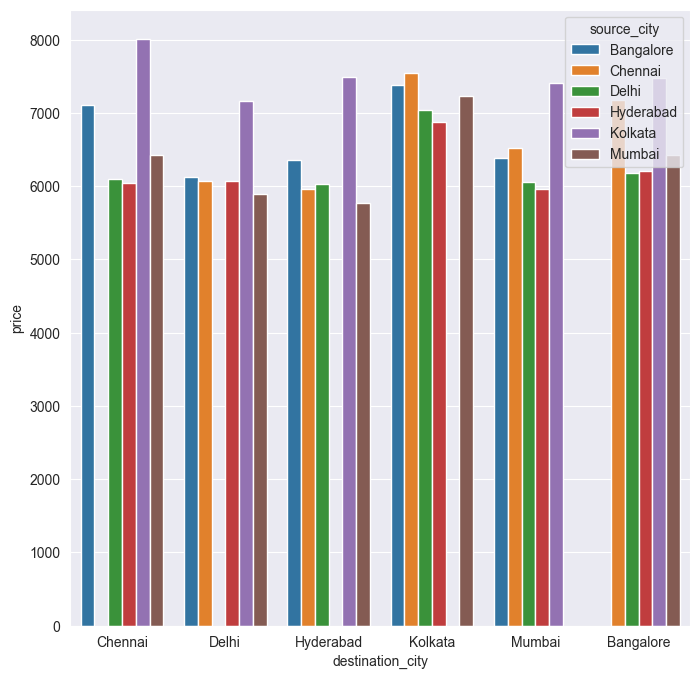

In [219]:
ll = df[df["class"]=="Economy"].groupby(["source_city","destination_city"])["price"].mean().round(0).astype("int64").reset_index()
fig,ax = plt.subplots(figsize=(8,8))
ll_dict = dict(ll["price"])
sns.barplot(ax=ax,x=ll["destination_city"],y=ll["price"],hue=ll["source_city"])
for i in ll_dict:
    v = ll_dict[i]

In [240]:
ll_1 = df[df["class"]=="Economy"].groupby(["airline"])["price"].mean().round(0).astype("int64").reset_index()
ll_1.columns = ["airline","economy_price"]

ll_2 = df[df["class"]=="Business"].groupby(["airline"])["price"].mean().round(0).astype("int64").reset_index()
ll_2.columns = ["airline","business_price"]

lq = pd.merge(left=ll_1,right=ll_2,on="airline",how="inner")
lq_1 = lq[["airline","economy_price"]]
lq_1.columns = ["airline","price"]
lq_1["class"] = "Economy"

lq_2 = lq[["airline","business_price"]]
lq_2.columns = ["airline","price"]
lq_2["class"] = "Business"

lr = pd.concat([lq_1,lq_2],axis=0)
lr = lr.sort_values(by=["airline","class"])
lr = lr.sort_values(by=["class"],ascending=False)
lr = lr[["airline","class","price"]].reset_index(drop=True).reset_index()
lr

,index,airline,class,price
0,0,Air_India,Economy,7314
1,1,Vistara,Economy,7807
2,2,Air_India,Business,47131
3,3,Vistara,Business,55477


<Axes: xlabel='airline', ylabel='price'>

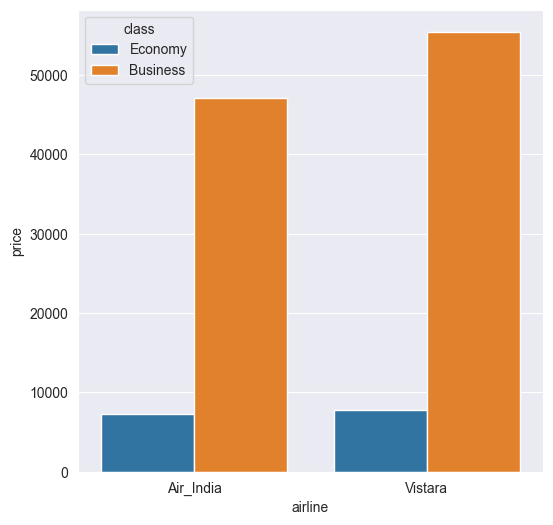

In [255]:
lr_dict = dict(lr["price"])
fig,ax = plt.subplots(figsize=(6,6))
sns.barplot(ax=ax,x=lr["airline"],y=lr["price"],hue=lr["class"])

In [ ]:
business_